# Numpy Demo
> This Notebook basically explores the numpy library and its essentials required for ML and EDA

In [ ]:
%pip install -r requirements.txt

Let's say we want to use climate data like the temperature, rainfall and humidity in a region to determine if the region is well suited for growing apples. A really simple approach for doing this would be to formulate the relationship between the annual yield of apples (tons per hectare) and the climatic conditions like the average temperature (in degrees Farenheit), rainfall (in millimeters) & average relative humidity (in percentage) as a linear equation.

> yield_of_apples = wl * temperature + w2 * rainfall + w3 * humidity

**w1 ,w2 ,w3** are some weights from historic statistic data

> example
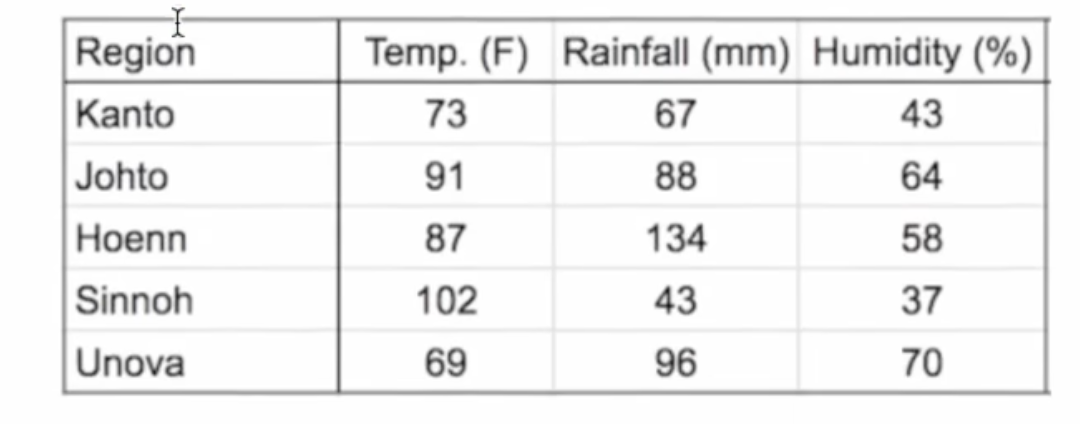

In [1]:
w1,w2,w3=0.3,0.2,0.5

In [2]:
kanto_temp=73
kanto_humidity=43
kanto_rainfall=67

kanto_yield=w1*kanto_temp + w2*kanto_humidity + w3*kanto_rainfall
print(f"yield of apples in kanto is {kanto_yield} tons per hectare")

yield of apples in kanto is 64.0 tons per hectare


The drawback in above way is for every parameter we are creating a variable instead of doing in this way we can create a **VECTOR** to repersent the parameters
therefore , 
each region can be reperesented as a vector and also the weights

In [12]:
#location params temp ,rainfall ,humidity 
kanto=[73,43,67]
johto=[91,88,64]
hoenn=[87,134,58]
sinnoh=[102,43,37]
unova=[69,96,70]

#weights
weights = [0.3, 0.2, 0.5]
def calculate_yield(region):
    """
        Calculate the agricultural yield for a given region based on environmental parameters.
        Inputs:
            - region: A list containing temperature, humidity, and rainfall values.
        Outputs:
            - The calculated yield as a float.
    """
    result=0
    #zip is used to pair each environmental parameter with its corresponding weight
    for param,wt in zip(region,weights):
        result += param * wt
    return result

help(calculate_yield)
kanto_yield = calculate_yield(kanto)
print(f"Kanto Yield: {kanto_yield} tons per hectare")

Help on function calculate_yield in module __main__:

calculate_yield(region)
    Calculate the agricultural yield for a given region based on environmental parameters.
    Inputs:
        - region: A list containing temperature, humidity, and rainfall values.
    Outputs:
        - The calculated yield as a float.

Kanto Yield: 64.0 tons per hectare


In [4]:
import numpy as np

kanto = np.array([73, 43, 67])


weights = np.array([0.3, 0.2, 0.5])
print(type(weights))
print(f"Kanto's humidity: {kanto[2]}%")
kanto_yield = np.dot(kanto, weights)
print(f"Kanto Yield: {int(kanto_yield)} tons per hectare")

<class 'numpy.ndarray'>
Kanto's humidity: 67%
Kanto Yield: 64 tons per hectare


In [28]:
# ...existing code...
import time

# plain Python lists a1, a2 already created earlier
result = 0
t0 = time.perf_counter()
for x1, x2 in zip(a1, a2):
    result += x1 * x2
t1 = time.perf_counter()
print(f"Pure Python loop result={result} time={(t1-t0):.4f} s")

# NumPy arrays npa1, npa2 already created earlier
t0 = time.perf_counter()
result_np = np.dot(npa1, npa2)
t1 = time.perf_counter()
print(f"NumPy dot result={result_np} time={(t1-t0):.4f} s")
# ...existing

Pure Python loop result=833332333333500000 time=0.1171 s
NumPy dot result=833332333333500000 time=0.0005 s


Hence **Numpy** is faster and more efficient than using traditional lists

In order to compute the yield for all the regions we can simply create an multi dimensional array instead of creating single array per region

**Numpy** Can support multi dimensional arrays 1D 2D 3D .. etc

In [ ]:
regionData=np.array([
    [73, 43, 67],
    [80, 50, 60],
    [75, 45, 65]
])

demo3D=np.array([[
                   [73, 43],
                   [80, 50],
                   [75, 45]
                ],

                [
                    [15, 20],
                    [25, 30],
                    [35, 40]
                ]
               ])

print(np.shape(regionData))
print(np.shape(demo3D))

(3, 3)
(2, 3, 2)


shape() method returns the dimensions of array

for purpose of efficency and performance all elements in numpy should have same data types
we can check the type using **dtype** method
and numpy has diff data type than python

> note : if one of the number in the np array is float remaing all will convert into float

**matmul** method is used to do the matrix multiplication
it can also be done using **@**

In [ ]:
#predicting the yield of each region
regionData=np.array([
    [73, 43, 67],
    [80, 50, 60],
    [75, 45, 65]
])
weights = np.array([0.3, 0.2, 0.5])
yield_vector=np.matmul(regionData,weights)
print(yield_vector)



[64. 64. 64.]


**.genfromtxt()** : In the Numpy library, numpy.genfromtxt function is used to read data from any text file and convert it into Numpy array. It is generally used in handling data with some missing or inconsistent values. This function has various fields of applications such as in the machine learning field, where missing or inconsistent data must be filled with some values to perform operations.

**.concatenate()** The NumPy `concatenate()` function is an array operation used to join two or more arrays along a specified axis. It is useful for combining datasets, restructuring arrays, and performing data manipulation tasks efficiently.

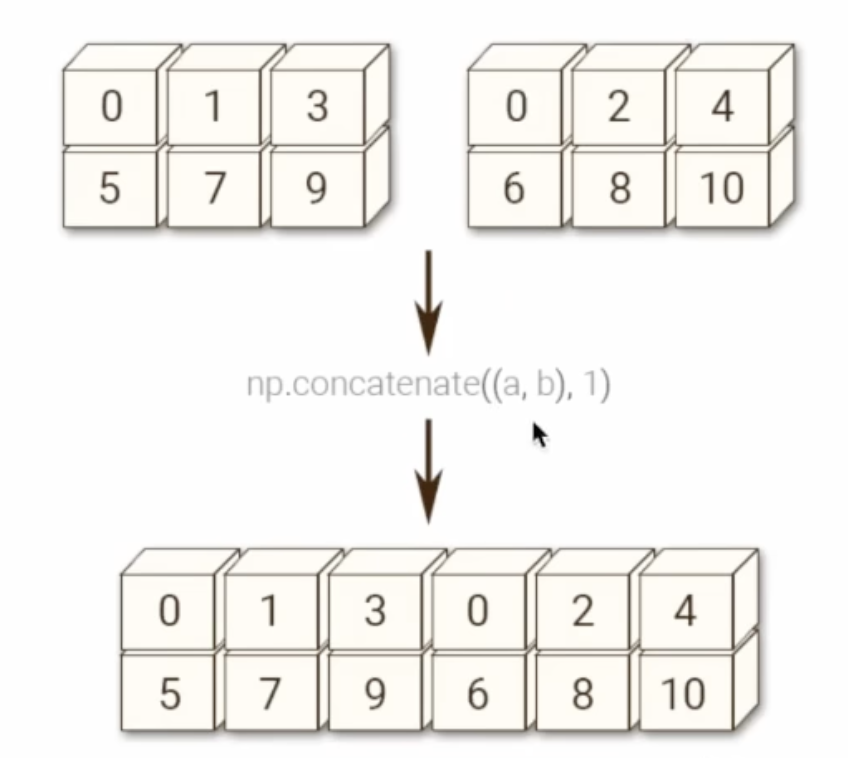

In [ ]:
climateData=np.genfromtxt("weather_data.txt", delimiter=",", skip_header=1)
climateData.shape
yieldOfApples=climateData @ weights
yieldOfApples
#as we are adding a column we had set axis =1 if axis=0 then it adds a row
climateResults=np.concatenate((climateData,yieldOfApples.reshape(100000,1)),axis=1)
np.savetxt("climate_results.txt",climateResults,fmt="%.4f",delimiter=",",header="temp,humidity,rainfall,yield",comments='')

> References https://numpy.org/doc/stable/reference/routines.html

**Arithmetic Ops and Broadcasting**

In [14]:
arr1=np.array(
        [
            [1,0,0],
            [0,1,0],
            [0,0,1]
        ]
    )
arr2=np.array(
        [
            [1,0,0],
            [0,1,0],
            [0,0,1]
        ]
    )

sum_arr=arr1+arr2
print("Sum of two arrays:\n",sum_arr)

#Scalar addition
scalar_add=arr1+3
print("Array after scalar addition:\n",scalar_add)

#Element wise subtraction
element_wise_sub=arr1-arr2
print("Array after element wise subtraction:\n",element_wise_sub)

#Scalar division
scalar_div=arr1/2
print("Array after scalar division:\n",scalar_div)

#Element wise multiplication
element_wise_mul=arr1*arr2
print("Array after element wise multiplication:\n",element_wise_mul)

#scalar Multiplication
scalar_mul=arr1*2
print("Array after scalar multiplication:\n",scalar_mul)

#scalar mod
scalar_mod=arr1%2
print("Array after scalar mod:\n",scalar_mod)

Sum of two arrays:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]
Array after scalar addition:
 [[4 3 3]
 [3 4 3]
 [3 3 4]]
Array after element wise subtraction:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
Array after scalar division:
 [[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
Array after element wise multiplication:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Array after scalar multiplication:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]
Array after scalar mod:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


**Broadcasting in numpy**

In [24]:
arr3=np.array([1,0,0])
broadcast_sum=arr1+arr3
print("Array after broadcasting addition:\n",broadcast_sum)


arr4=np.array([5,5,0])
print(arr4.shape)
arr5=np.array([[0],[5],[1]])
print(arr5.shape)
print(arr4)
print(arr5)

# (3,) is considered as (3,1)
# (1,3) is broadcasted to (3,3)
# (3,1) is broadcasted to (3,3)
broadcast_sum2=arr4+arr5
print("Array after broadcasting addition with different shapes:\n",broadcast_sum2)

"""
    After Broadcasting
    5 5 0			0 0 0
    5 5 0		+	5 5 5	
    5 5 0			1 1 1
"""


Array after broadcasting addition:
 [[2 0 0]
 [1 1 0]
 [1 0 1]]
(3,)
(3, 1)
[5 5 0]
[[0]
 [5]
 [1]]
Array after broadcasting addition with different shapes:
 [[ 5  5  0]
 [10 10  5]
 [ 6  6  1]]


'\n    After Broadcasting\n    5 5 0\t\t\t0 0 0\n    5 5 0\t\t+\t5 5 5\t\n    5 5 0\t\t\t1 1 1\n'

>Broadcasting under the hood

* **Dimension Padding**: If the arrays have different numbers of dimensions, the shape of the one with fewer dimensions is automatically padded with ones on its leading (left) side until both shapes have the same length.

* **Dimension Comparison**: The two arrays' dimensions are then compared element-wise, starting from the rightmost (trailing) dimension. The operation is possible if, for each dimension, the sizes are either equal, or one of them is 1.

* **Broadcasting**: Dimensions with a size of 1 are "stretched" conceptually (without copying data) to match the size of the other array's corresponding dimension.

* **Error Condition**: If in any dimension the sizes disagree and neither is equal to 1, a ValueError is raised, and the arrays cannot be broadcast together

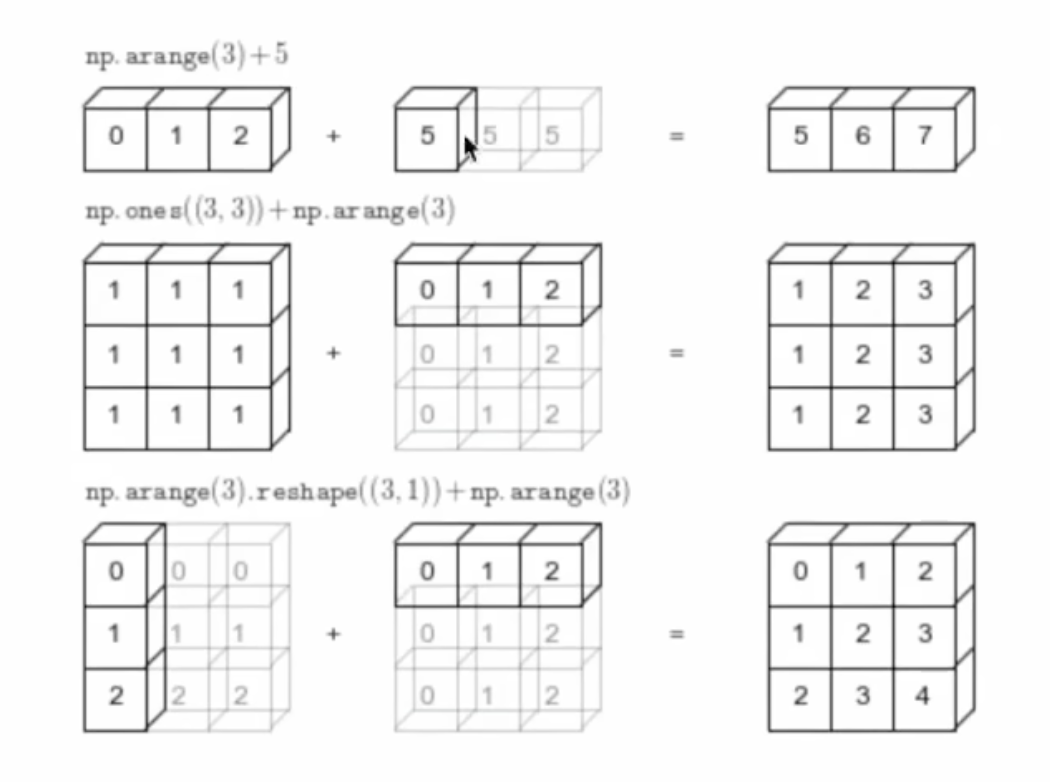

**Logical operations**

In [ ]:
# Elements are compared
arr1=np.array([[1,2,3],[4,5,6]])
arr2=np.array([[1,2,3],[4,5,6]])

print(arr1==arr2)
print(arr1!=arr2)

# We can find matching elements just by using the equality operator
print((arr1==arr2).sum())
# basically True evaluates to 1 and False evaluates to 0

[[ True  True  True]
 [ True  True  True]]
[[False False False]
 [False False False]]
6


**Array Indexing and slicing**


In [33]:
arr1=np.array([[1,2,3],[4,5,6]])
#Select element 5
print(arr1[1,1])

#selecting elements on ranges
#picks row 0 and 1 and columns 1 and 2
print(arr1[0:2, 1:3])
#mixing indices and ranges
#Selects 1 st index elements staring from row 0
print(arr1[0:2, 1]) 

5
[[2 3]
 [5 6]]
[2 5]


**Some other useful funcs**

In [ ]:
np_Zeros=np.zeros((3,3))
print(np_Zeros)

np_Ones=np.ones((3,3))
print(np_Ones)

np_Identity=np.eye(3)
print(np_Identity)

#random Vector
np_Random=np.random.rand(4,1)
print(np_Random)

#random matrix
np_Random_Matrix=np.random.randn(4,4)
print(np_Random_Matrix)

#rand vs randn
# rand generates random numbers from a uniform distribution over [0, 1)
# randn generates random numbers from a standard normal distribution (mean 0, variance 1)

np_full = np.full((3,3),7)
print(np_full)

# we created 8 elements now possible shapes are : 
# (1,8), (2,4) , (4,2) , (8,1)
np_arange = np.arange(0, 8, 1).reshape((2, 4))
print(np_arange)

np_linspace = np.linspace(3, 27, 9)
print(np_linspace)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.83732172]
 [0.91792293]
 [0.7589657 ]
 [0.19110771]]
[[-0.61137497  2.01062389  0.52765622 -0.04720083]
 [ 0.65287888  0.48958936 -0.04982034  0.60974289]
 [-0.4899174  -0.08577149 -0.76253343 -1.3441194 ]
 [ 1.26251009  0.46677678 -0.76606065  1.88647078]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]
[[0 1 2 3]
 [4 5 6 7]]
[ 3.  6.  9. 12. 15. 18. 21. 24. 27.]
